## Kaggle S5E5 Predict Calories

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

test_data = pd.read_csv("test.csv")
train_data = pd.read_csv("train.csv")

test_data.head

<bound method NDFrame.head of             id     Sex  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0       750000    male   45   177.0    81.0       7.0        87.0       39.8
1       750001    male   26   200.0    97.0      20.0       101.0       40.5
2       750002  female   29   188.0    85.0      16.0       102.0       40.4
3       750003  female   39   172.0    73.0      20.0       107.0       40.6
4       750004  female   30   173.0    67.0      16.0        94.0       40.5
...        ...     ...  ...     ...     ...       ...         ...        ...
249995  999995  female   56   159.0    62.0       6.0        85.0       39.4
249996  999996    male   32   202.0   101.0       3.0        84.0       38.4
249997  999997  female   31   164.0    64.0      14.0        98.0       40.1
249998  999998  female   62   158.0    61.0      25.0       106.0       40.7
249999  999999    male   31   199.0    96.0      15.0        98.0       39.9

[250000 rows x 8 columns]>

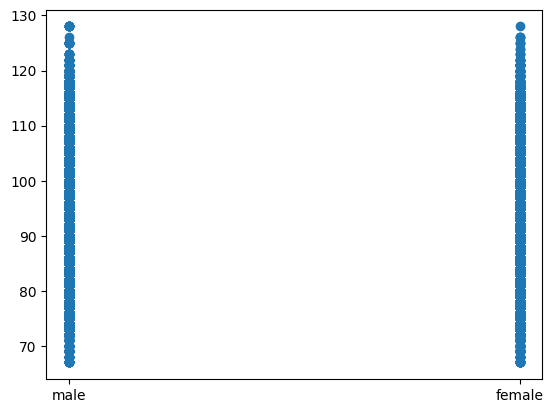

In [3]:
plt.scatter(test_data.Sex, test_data.Heart_Rate)
plt.show()

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          750000 non-null  int64  
 1   Sex         750000 non-null  object 
 2   Age         750000 non-null  int64  
 3   Height      750000 non-null  float64
 4   Weight      750000 non-null  float64
 5   Duration    750000 non-null  float64
 6   Heart_Rate  750000 non-null  float64
 7   Body_Temp   750000 non-null  float64
 8   Calories    750000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 51.5+ MB


In [6]:
train_data.describe()

,id,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
mean,374999.500000,41.420404,174.697685,75.145668,15.421015,95.483995,40.036253,88.282781
std,216506.495284,15.175049,12.824496,13.982704,8.354095,9.449845,0.779875,62.395349
min,0.000000,20.000000,126.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,187499.750000,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,34.000000
50%,374999.500000,40.000000,174.000000,74.000000,15.000000,95.000000,40.300000,77.000000
75%,562499.250000,52.000000,185.000000,87.000000,23.000000,103.000000,40.700000,136.000000
max,749999.000000,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


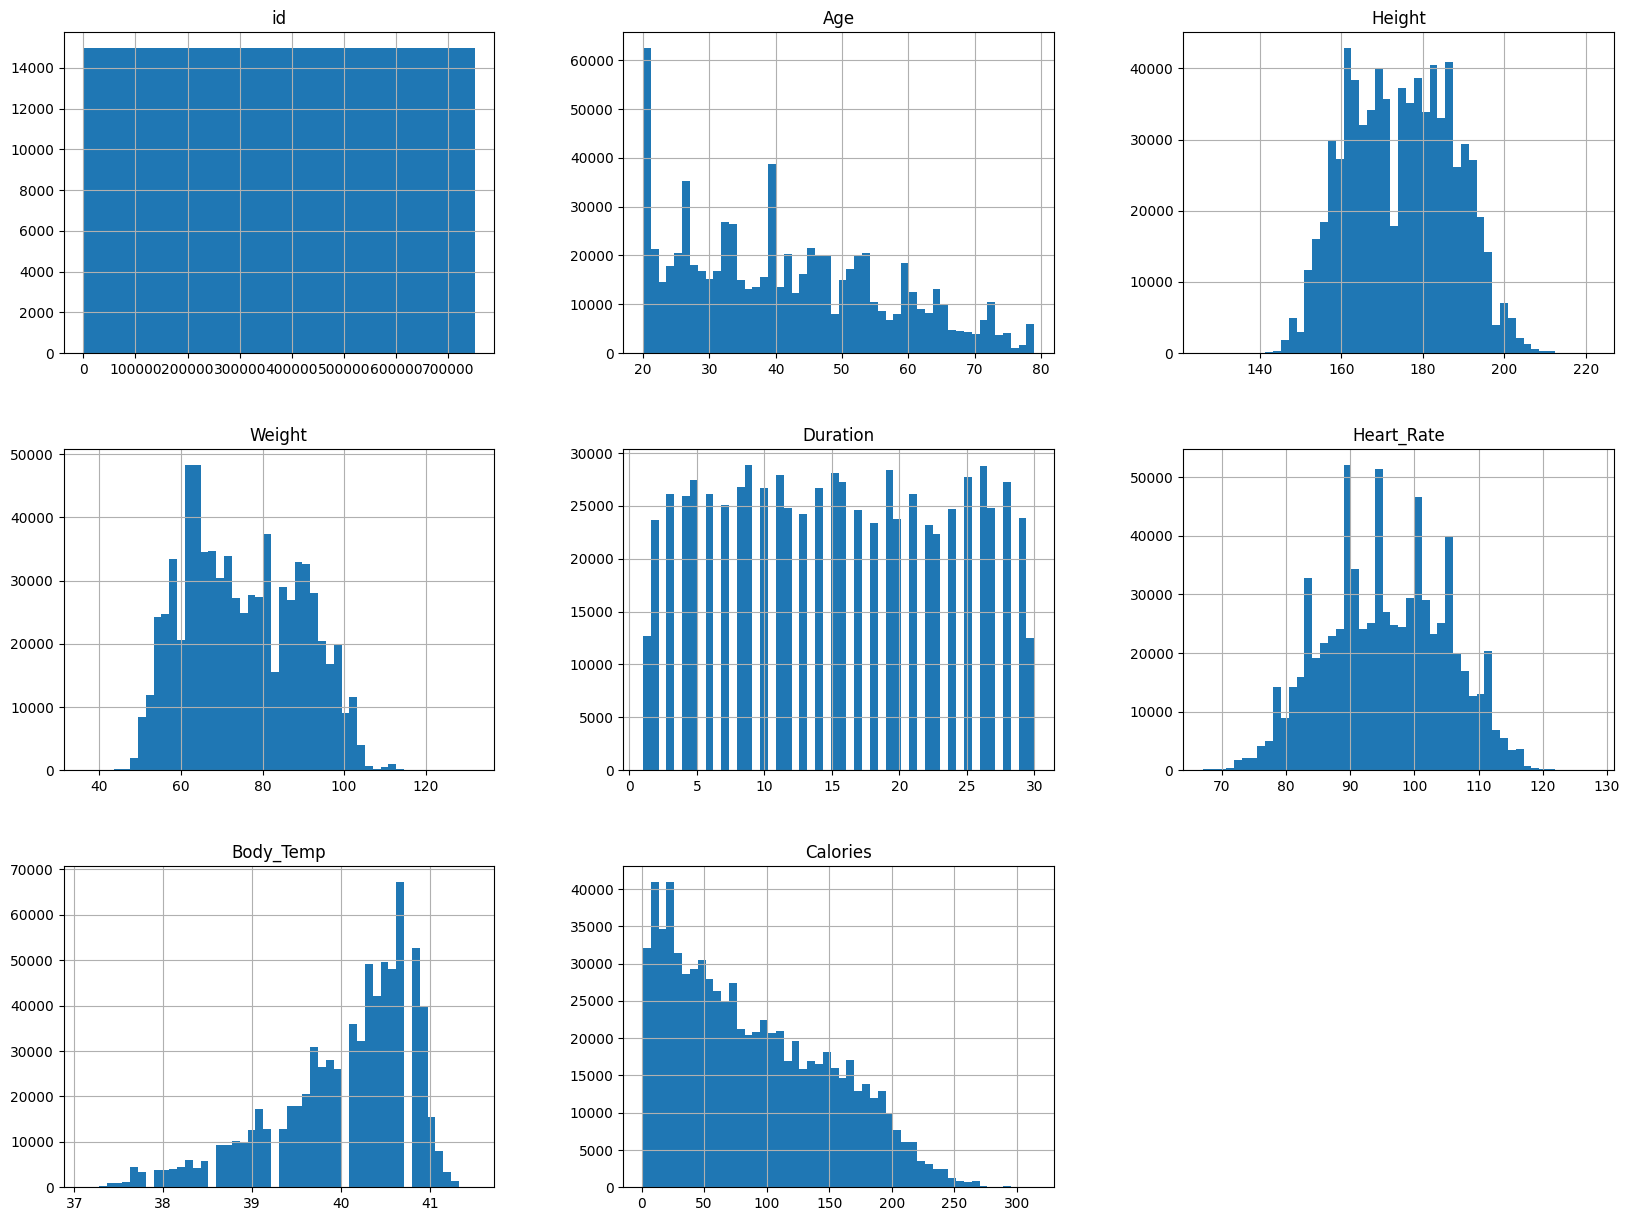

In [7]:
train_data.hist(bins=50, figsize=(20,15))
plt.show()

In [8]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(train_data, test_size=0.2, random_state=42)


In [10]:

train = train_data.drop("Calories", axis=1)
train["Sex"] = train["Sex"].map({"male": 1, "female": 0})
train_labels = train_data["Calories"].copy()

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(train, train_labels)

LinearRegression()